In [3]:
%matplotlib inline
from pandas import *
import matplotlib.pyplot as plt
import os.path
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr 

In [2]:
#load data for histogram and mannwhitneyu
allGates=DataFrame()
allGates=allGates.from_csv('all_perf.csv', sep=',')

deterGates=DataFrame()
deterGates=deterGates.from_csv('deter_perf.csv', sep=',')

probGates=DataFrame()
probGates=probGates.from_csv('prob_perf.csv', sep=',')

([array([ 70.,  87.,  58.,  27.,  10.,  13.,   7.,   6.,  10.,  12.]),
  array([ 226.,   24.,   25.,   18.,    4.,    3.,    0.,    0.,    0.,    0.]),
  array([ 300.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])],
 array([ 0.  ,  0.98,  1.96,  2.94,  3.92,  4.9 ,  5.88,  6.86,  7.84,
         8.82,  9.8 ]),
 <a list of 3 Lists of Patches objects>)

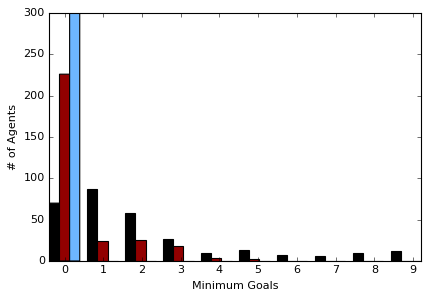

In [6]:
fig = plt.figure()
plt.ylabel("# of Agents")
plt.xlabel("Minimum Goals")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.hist([allGates[[col for col in list(allGates) if col.startswith('avgPerformance_')]].min(axis=1),
          deterGates[[col for col in list(deterGates) if col.startswith('avgPerformance_')]].min(axis=1),
          probGates[[col for col in list(probGates) if col.startswith('avgPerformance_')]].min(axis=1)],
         rwidth=0.8,align='left',stacked=False, color=['black','#920000','#6DB6FF'])

In [7]:
print mannwhitneyu(deterGates['minAvgPerformance'],probGates['minAvgPerformance'])
print mannwhitneyu(probGates['minAvgPerformance'],allGates['minAvgPerformance'])
print mannwhitneyu(deterGates['minAvgPerformance'],allGates['minAvgPerformance'])

MannwhitneyuResult(statistic=32400.0, pvalue=3.8801962981372311e-23)
MannwhitneyuResult(statistic=7200.0, pvalue=5.6790195146076043e-88)
MannwhitneyuResult(statistic=18920.5, pvalue=4.4130279806804487e-38)


In [8]:
data=read_csv("agentMeans.csv",header=None)
print(data.keys())
print(len(data[0]))

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            291, 292, 293, 294, 295, 296, 297, 298, 299, 300],
           dtype='int64', length=301)
502


<Container object of 15 artists>

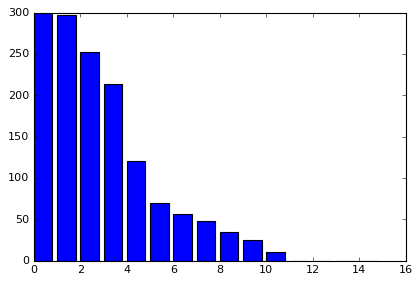

In [6]:
H=[]
V=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
fittest=[]
W=[]
for i in range(1,301):
    v=data[i][501]
    W.append(v)
    if v>11:
        fittest.append(i)
    H.append(v)
    for j in range(int(v)):
        V[j]=V[j]+1
plt.bar(range(15),V)

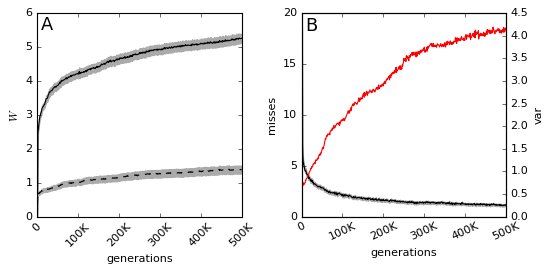

In [9]:
plt.figure(figsize=[7,3.5])
plt.subplot(1,2,1)
colM=['k','--k']
c=0
for S in ['on','off']:
    data=read_csv("agentMeans_{0}.csv".format(S),header=None)
    D=[]
    
    for i in range(501):
        D.append([])
    for i in range(1,301):
        for j in range(501):
            D[j].append(data[i][j])
    M=[]
    E=[]
    V=[]
    for i in range(501):
        M.append(np.mean(D[i]))
        E.append(np.std(D[i])/np.sqrt(301))
        V.append(np.var(D[i]))
    plt.plot(M,colM[c])
    plt.fill_between(range(len(M)),np.array(M)+np.array(E),np.array(M)-np.array(E),color='#AAAAAA',alpha=1.0)
    c=c+1
    if S=='on':
        W=D
plt.xticks([0,100,200,300,400,500],["0","100K","200K","300K","400K","500K"],rotation=45)
plt.xlabel("generations")
plt.ylabel(r"$W$")
#plot(range(501),LSTMW,'--k')
#fill_between(range(501),LSTMW+LSTME,LSTMW-LSTME,color='#AAAAAA',alpha=1.0)
plt.text(10,5.5,"A",fontsize=16)
    
    
plt.subplot(1,2,2)
data=read_csv("numOf0.csv",header=None)
Z=[]
Ze=[]
for i in range(501):
    R=[]
    for j in range(1,301):
        R.append(data[j][i])
    Z.append(np.mean(R))
    Ze.append(np.std(R)/np.sqrt(300))
plt.plot(Z,'k')
plt.fill_between(range(501),np.array(Z)+np.array(Ze),np.array(Z)-np.array(Ze),color='#AAAAAA',alpha=1.0)
#plot(LSTMM,'--k')
#fill_between(range(501),LSTMM+LSTMME,LSTMM-LSTMME,color='#AAAAAA',alpha=1.0)
plt.xticks([0,100,200,300,400,500],["0","100K","200K","300K","400K","500K"],rotation=25)
plt.xlabel("generations")
plt.ylabel("misses")
plt.twinx()
plt.plot(V,'r')
plt.ylabel(r"var")
plt.tight_layout()
plt.text(10,4.1,"B",fontsize=16)

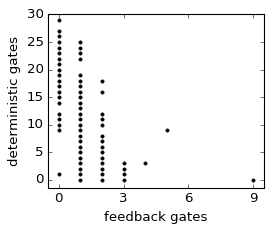

In [10]:
plt.figure(figsize=[3.5,3])
data=read_csv("FBvsDetGates.csv")
plt.plot(data["D"],data["F"],'.k')
plt.axis([-0.5,9.5,-1.5,30.1])
plt.xlabel("feedback gates",fontsize=12)
plt.ylabel("deterministic gates",fontsize=12)
plt.xticks([0,3,6,9],["0","3","6","9"],fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


In [11]:
np.corrcoef(data["D"],data["F"])
pearsonr(data["D"],data["F"])

(-0.52092696882995049, 8.6379758235831223e-06)

In [32]:
dataBirth=read_csv("mutualInfoBirth.csv",skiprows=1,header=None)
dataDeath=read_csv("mutualInfoDeath.csv",skiprows=1,header=None)

In [33]:
data=read_csv("agentMeans.csv",header=None)
H=[]
V=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
fittest=[]
W=[]
for i in range(1,301):
    v=data[i][501]
    W.append(v)
    if v>11:
        fittest.append(i)
    H.append(v)
    for j in range(int(v)):
        V[j]=V[j]+1
        

In [34]:
B=[]
D=[]
diff=[]
diffV=[]
fittest=range(301)
for t in range(501):
    where=1
    birthA=[]
    for i in range(1,301):
        if i in fittest:
            birthA.append(dataBirth[i][t])
    deathA=[]
    for i in range(300):
        SA=[]
        for j in range(24):
            if i in fittest:
                SA.append(dataDeath[where][t])
            where=where+1
        if i in fittest:
            deathA.append(np.mean(SA))
    B.append(np.mean(deathA))
    D.append(np.mean(birthA))
    delta=[]
    for i in range(len(birthA)):
        delta.append(deathA[i]-birthA[i])
    diff.append(np.mean(delta))
    diffV.append(np.var(delta))

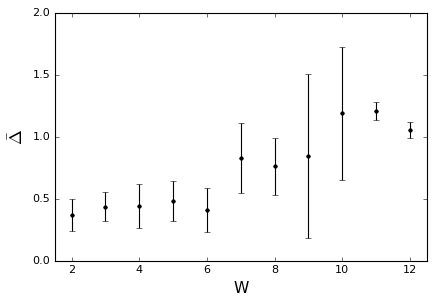

In [38]:

T=DataFrame()
T['W']=W
T['delta']=delta
T.sort_values('delta',inplace=True)

pool=dict()
M=[]
V=[]
for i in range(13):
    pool[i]=[]
for i in range(len(T['W'])):
    w=np.ceil(T['W'][i])
    d=T['delta'][i]
    pool[w].append(d)
for i in range(13):
    if(len(pool[i])==0):
        M.append(0)
        V.append(0)
    else:
        M.append(np.mean(pool[i]))
        V.append(np.var(pool[i]))
plt.plot(range(2,13),M[2:],'.k')
#fill_between(range(2,13),numpy.array(M[2:])+numpy.array(V[2:]),numpy.array(M[2:])-numpy.array(V[2:]),color="#AAAAAA",alpha=1.0)
plt.errorbar(range(2,13),M[2:],V[2:],fmt=".k")
plt.axis([1.5,12.5,0.0,2.0])
plt.xlabel("W",fontsize=14)
plt.ylabel(r'$\bar{\Delta}$',fontsize=16)


In [42]:
collector=dict()
collector=np.load('collector.npy', collector).item()

#get who is 
data=read_csv("mutualInfoDeath.csv")
det=[]
fb=[]
for i in range(300):
    if i==0:
        T="mutualInfoDeath2"
    else:
        T="mutualInfoDeath2."+str(i)
    if data[T][500]<=0.0:
        det.append(i+1)
    else:
        fb.append(i+1)

items=["go","turn","nop"]
Y=dict()
E=dict()
for T in ["ON","OFF"]:
    for i in items:
        for j in ["det","fb"]:
            Y["{0} {1} {2}".format(i,j,T)]=[]
            E["{0} {1} {2}".format(i,j,T)]=[]
for k in Y.keys():
    for i in range(500):
        Y[k].append([])
        E[k].append(0.0)
for T in ["ON","OFF"]:
    for i in range(1,300):
        if i in det:
            for j in range(len(items)):
                for k in range(500):
                    Y[items[j]+" det "+T][k].append(collector[i][T][j][k])
        else:
            for j in range(len(items)):
                for k in range(500):
                    Y[items[j]+" fb "+T][k].append(collector[i][T][j][k])
for k in Y.keys():
    for i in range(500):
        E[k][i]=np.std(Y[k][i])/np.sqrt(len(Y[k][i]))
        Y[k][i]=np.mean(Y[k][i])

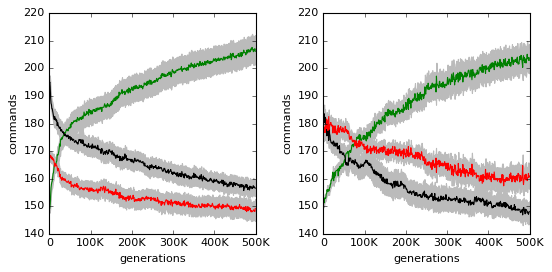

In [43]:
lineMode={"go":'-g',"turn":'-k',"nop":'-r'}
items=["go","turn","nop"]
plt.figure(figsize=[7,3.5])
where=1
for K in ["fb","det"]:
    plt.subplot(1,2,where)
    for T in ["ON","OFF"]:
        if(T=="OFF"):#(K=="det" and T=="OFF"):
            pass
        else:
            plt.axis([0,500,140,220])
            plt.xlabel("generations")
            plt.xticks([0,100,200,300,400,500],["0","100K","200K","300K","400K","500K"])
            plt.ylabel("commands")
            for i in items:
                plt.plot(range(500),Y["{0} {1} {2}".format(i,K,T)],lineMode[i])
                y=np.array(Y["{0} {1} {2}".format(i,K,T)])
                e=np.array(E["{0} {1} {2}".format(i,K,T)])
                plt.fill_between(range(500),y+e,y-e,color="#BBBBBB")

    where=where+1
plt.tight_layout()

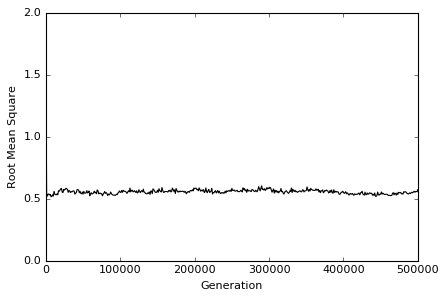

In [45]:

plt.xticks([0,100,200,300,400,500],["0","100000","200000","300000","400000","500000"])
plt.ylim([0,2])

plt.xlabel("Generation")
plt.ylabel("Root Mean Square")
plt.plot(range(len(diff)),diff, color='k')

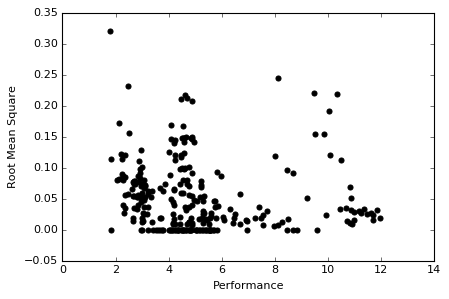

In [14]:
agentMeans_on=DataFrame()
agentMeans_on= read_csv('agentmeans_gen.csv', sep=',', encoding='utf-8')
agentRSM=DataFrame()
agentRSM=read_csv('rsm_gen.csv', sep=',', encoding='utf-8')

plt.xlabel("Performance")
plt.ylabel("Root Mean Square")
# plt.savefig("../graphs/RMS_{0}_{1}.eps".format(statsFilename[:-4], 'a'))

plt.scatter(agentMeans_on.ix[500], agentRSM.ix[500],color="BLACK")

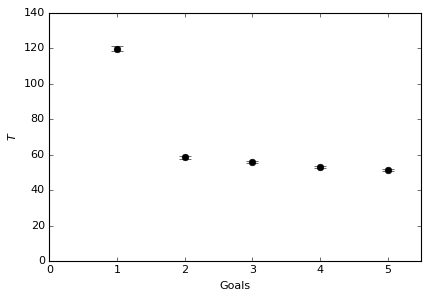

In [17]:
average_time=DataFrame()
average_time=read_csv('average_time.csv',sep=',')
std_time=DataFrame()
std_time=read_csv('std_time.csv', sep=',')

time_pts=[500]
fig = plt.figure()
ax = plt.subplot(111)
handles, labels = ax.get_legend_handles_labels()
# plt.title("Time to Goals")
plt.xlabel("Goals")
plt.ylabel("T", style='italic')
plt.xlim([0,5.5])
plt.ylim([0,140]) 
plt.hold
# plt.savefig("../graphs/Avg_Time_to_Goal_LOD_{0}_{1}.eps".format(statsFilename[0:-6],'a'))
goals=[0,1,2,3,4,5]

dots_one = plt.errorbar(goals, average_time['0'], std_time['0'],ecolor="black",elinewidth=.5,
                capthick=.5, fmt ="o", fillstyle = 'full',color="black", label=time_pts[0]*100,capsize=5)

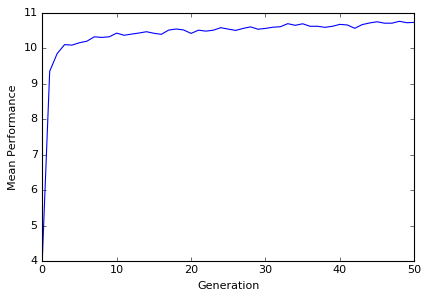

In [18]:
agentMeans_on=read_csv('1_map.csv', sep=',')
plt.xlabel("Generation")
plt.ylabel("Mean Performance")
plt.plot(agentMeans_on.mean(axis=1))